In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_excel("data_universite.xlsx")

In [5]:
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [6]:
data.shape #Afichage de dimension de notre jeu de données

(1534, 145)

In [7]:
data.columns.tolist()#Afficher la liste complètes des colonnes

['ID number',
 'Name',
 'year',
 'ZIP code',
 'Highest degree offered',
 'County name',
 'Longitude location of institution',
 'Latitude location of institution',
 'Religious affiliation',
 'Offers Less than one year certificate',
 'Offers One but less than two years certificate',
 "Offers Associate's degree",
 'Offers Two but less than 4 years certificate',
 "Offers Bachelor's degree",
 'Offers Postbaccalaureate certificate',
 "Offers Master's degree",
 "Offers Post-master's certificate",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 "Offers Doctor's degree - other",
 'Offers Other degree',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentil

In [8]:
data.info()#Afficher le nombre et le type des valeurs de chaque colonn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


In [9]:
#Représenter les colonnes qui ont plus de 20% des valeurs manquantes
pourcentage=(data.isnull().sum()/len(data))*100
colonne_manquant=pourcentage[pourcentage > 20]
print("les colonnes qui ont plus de 20% des valeurs manquantes:")
print(colonne_manquant)

les colonnes qui ont plus de 20% des valeurs manquantes:
SAT Critical Reading 25th percentile score                  23.794003
SAT Critical Reading 75th percentile score                  23.794003
SAT Math 25th percentile score                              22.946545
SAT Math 75th percentile score                              22.946545
SAT Writing 25th percentile score                           53.455020
SAT Writing 75th percentile score                           53.455020
ACT Composite 25th percentile score                         21.838331
ACT Composite 75th percentile score                         21.838331
Number of first-time undergraduates - in-state              40.612777
Percent of first-time undergraduates - in-state             40.612777
Number of first-time undergraduates - out-of-state          40.612777
Percent of first-time undergraduates - out-of-state         40.612777
Number of first-time undergraduates - foreign countries     40.612777
Percent of first-time undergradua

In [10]:
# Filtrer les colonnes avec plus de 20% de valeurs manquantes
colonnes_a_supprimer = pourcentage[pourcentage > 20].index

# Supprimer les colonnes avec plus de 20% de valeurs manquantes
data2 = data.drop(columns=colonnes_a_supprimer)

# Afficher les dimensions du DataFrame après suppression des colonnes
print("Dimensions du DataFrame après suppression des colonnes : ", data2.shape)

Dimensions du DataFrame après suppression des colonnes :  (1534, 127)


In [11]:
print("Colonnes retenues :")
print(data2.columns.tolist())

Colonnes retenues :
['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered', 'County name', 'Longitude location of institution', 'Latitude location of institution', 'Religious affiliation', 'Offers Less than one year certificate', 'Offers One but less than two years certificate', "Offers Associate's degree", 'Offers Two but less than 4 years certificate', "Offers Bachelor's degree", 'Offers Postbaccalaureate certificate', "Offers Master's degree", "Offers Post-master's certificate", "Offers Doctor's degree - research/scholarship", "Offers Doctor's degree - professional practice", "Offers Doctor's degree - other", 'Offers Other degree', 'Applicants total', 'Admissions total', 'Enrolled total', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'Estimated enrollment, total', 'Estimated enrollment, full time', 'Estimated enrollment, part time', 'Estimated undergraduate enrollment, total', 'Estimated undergraduate enrollment, full time', 'E

In [12]:
data2.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0


In [13]:
#Supprimer les lignes qui ont au moins une valeur manquante
data3=data2.dropna()
data3.shape#les dimensions de nos données netoyer

(1013, 127)

In [14]:
data_quantitatif=data3.select_dtypes(include=['int64','float64'])#analyse descriptive des variables quantitatif
data_quantitatif.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,"Estimated enrollment, total",...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
count,1013.000000,1013.0,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,182793.921027,2013.0,-88.698690,38.549213,7528.461007,4195.286278,1249.670286,53.587364,54.079961,9003.877591,...,90.696940,83.896347,38.776900,38.086871,13.920039,36.624877,71.119447,64.576505,63.895360,7.738401
std,43353.803794,0.0,14.487301,4.709112,9698.052409,4726.289411,1410.974155,35.101962,31.726451,10411.535918,...,11.297012,17.621126,15.681413,15.387432,11.723280,20.911857,28.587508,18.284135,18.396245,6.906467
min,100654.000000,2013.0,-157.859411,19.701854,119.000000,62.000000,33.000000,0.000000,0.000000,271.000000,...,41.000000,25.000000,5.000000,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000
25%,152336.000000,2013.0,-94.874529,35.127437,1762.000000,1146.000000,348.000000,14.000000,28.000000,2229.000000,...,86.000000,71.000000,28.000000,27.000000,6.000000,21.000000,48.000000,53.000000,52.000000,3.000000
50%,183974.000000,2013.0,-85.374960,39.716465,3789.000000,2455.000000,673.000000,65.000000,50.000000,4665.000000,...,95.000000,92.000000,38.000000,37.000000,11.000000,35.000000,80.000000,67.000000,66.000000,6.000000
75%,215099.000000,2013.0,-78.156882,41.808205,9164.000000,5044.000000,1552.000000,86.000000,88.000000,11619.000000,...,99.000000,99.000000,48.000000,47.000000,19.000000,51.000000,98.000000,78.000000,77.000000,11.000000
max,448840.000000,2013.0,-68.673839,61.191235,72676.000000,35815.000000,10241.000000,100.000000,100.000000,79576.000000,...,100.000000,100.000000,96.000000,92.000000,81.000000,96.000000,100.000000,100.000000,100.000000,68.000000


In [15]:
data_qualitatif=data3.select_dtypes(include=['object'])#analyse descriptive des variables qualitatif
for col in data_qualitatif.columns:
    print("Variable :", col)
    print("Nombre de modalités uniques :", data_qualitatif[col].nunique())
    print("Fréquence des modalités :")
    print(data_qualitatif[col].value_counts(normalize=True))
    print("\n")

Variable : Name
Nombre de modalités uniques : 1006
Fréquence des modalités :
Name
Union College                                0.001974
Westminster College                          0.001974
Aquinas College                              0.001974
University of St Thomas                      0.001974
Marian University                            0.001974
                                               ...   
University of Maryland-Baltimore County      0.000987
University of Maryland-College Park          0.000987
University of Maryland Eastern Shore         0.000987
Morgan State University                      0.000987
University of South Florida-St Petersburg    0.000987
Name: proportion, Length: 1006, dtype: float64


Variable : ZIP code
Nombre de modalités uniques : 1010
Fréquence des modalités :
ZIP code
7940          0.001974
7102          0.001974
2467          0.001974
45177         0.000987
44720-3396    0.000987
                ...   
21250         0.000987
20742         0.000987
2

In [16]:
top_universite=data3.nlargest(20,'Applicants total')#les 20 universités qui ont reçu le plus grand nombre de candidatures
print(top_universite[['Name','Applicants total', 'Admissions total', 'Enrolled total']])

                                           Name  Applicants total  \
84         University of California-Los Angeles           72676.0   
81            University of California-Berkeley           61717.0   
86           University of California-San Diego           60832.0   
841                         New York University           57845.0   
83              University of California-Irvine           56515.0   
87       University of California-Santa Barbara           55258.0   
77       California State University-Long Beach           55019.0   
863               St John's University-New York           51634.0   
126                  San Diego State University           51163.0   
82               University of California-Davis           49820.0   
1371                         Liberty University           48054.0   
1133  Pennsylvania State University-Main Campus           47552.0   
137           University of Southern California           47358.0   
605            University of Michi

In [17]:
data3[['Applicants total', 'Admissions total', 'Enrolled total']].corr()

,Applicants total,Admissions total,Enrolled total
Applicants total,1.000000,0.851739,0.778466
Admissions total,0.851739,1.000000,0.878515
Enrolled total,0.778466,0.878515,1.000000


on remarque que il y'as une forte corrélation entre le nombre des candidatures et le nombre d'admission ainsi avec le nombre des inscriptions

In [18]:
classement_admissions = data3.nlargest(1013, 'Admissions total')
classement_admissions [['Name','Applicants total','Admissions total']].head()

,Name,Applicants total,Admissions total
1080,Drexel University,43945.0,35815.0
36,Northern Arizona University,33989.0,31057.0
863,St John's University-New York,51634.0,27449.0
359,Indiana University-Bloomington,37826.0,27300.0
1133,Pennsylvania State University-Main Campus,47552.0,25772.0


In [19]:
classement_enroll = data3.nlargest(20, 'Enrolled total')
classement_enroll [['Name','Enrolled total']]

,Name,Enrolled total
1309,Texas A & M University-College Station,10241.0
606,Michigan State University,8061.0
1133,Pennsylvania State University-Main Campus,7649.0
359,Indiana University-Bloomington,7604.0
34,University of Arizona,7401.0
301,University of Illinois at Urbana-Champaign,7329.0
1311,The University of Texas at Austin,7249.0
33,Arizona State University-Tempe,7171.0
998,Ohio State University-Main Campus,7130.0
5,The University of Alabama,6454.0


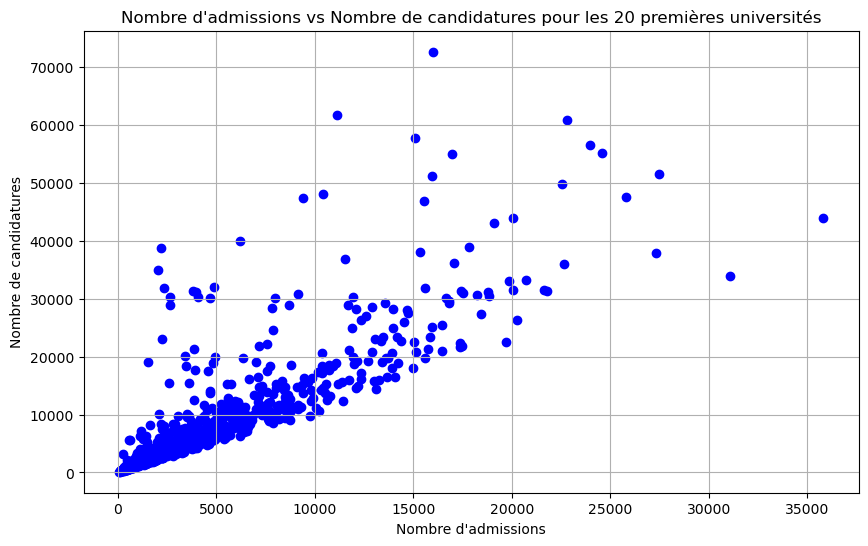

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(classement_admissions['Admissions total'], classement_admissions['Applicants total'], color='blue')

# Ajouter des titres et des labels
plt.title("Nombre d'admissions vs Nombre de candidatures pour les 20 premières universités")
plt.xlabel("Nombre d'admissions")
plt.ylabel("Nombre de candidatures")
plt.grid(True)

on peut pas dire que  les universités avec un nombre élevé d’admissions sont preferer par les etudiants

In [21]:
data3['Control of institution'].head(20)

0                     Public
1                     Public
3                     Public
4                     Public
5                     Public
7                     Public
8                     Public
13                    Public
15                    Public
17    Private not-for-profit
18                    Public
19                    Public
20    Private not-for-profit
21    Private not-for-profit
22                    Public
23    Private not-for-profit
26                    Public
27    Private not-for-profit
31    Private not-for-profit
33                    Public
Name: Control of institution, dtype: object

In [22]:
somme_candidatures_publiques = data3.loc[data3['Control of institution'] == 'Public', 'Applicants total'].sum()
somme_candidatures_prive = data3.loc[data3['Control of institution'] == 'Private not-for-profit', 'Applicants total'].sum()
print("le nombre des etudiants qui ont postules pour les universite publique est:",somme_candidatures_publiques)
print("le nombre des etudiants qui ont postules pour les universite privee est:",somme_candidatures_prive)


if somme_candidatures_publiques>somme_candidatures_prive:
    print ("les etudiants preferent les universites publique")
else :
    print ("les etudiants preferent les universites prives")

le nombre des etudiants qui ont postules pour les universite publique est: 4651824.0
le nombre des etudiants qui ont postules pour les universite privee est: 2974507.0
les etudiants preferent les universites publique


In [23]:
data3.to_csv('data3.csv', index=False)

In [25]:
files.download('data3.csv')

NameError: name 'files' is not defined